# 5 Stages of Summarization: From Beginner to Expert

Summarization is a vital component of many LLM tasks. In practical scenarios, you'll run into use cases where turning extensive texts into concise, meaningful points is essential.

Depending on the text's length you're addressing, various summarization techniques can be applied.

Here, we'll outline 5 distinct levels of summarization, ranging from basic to advanced. Remember, these aren't the only methods out there.

**5 Levels Of Summarization:**
Summarize a few sentences - Basic Prompt
Summarize several paragraphs - Prompt Templates
Summarize a few pages - Map Reduce
Summarize a whole book - Best Representation Vectors
Summarize text of an indeterminate length - Agents.
1. **Summarize a few sentences** - Basic Prompt
2. **Summarize several paragraphs** - Prompt Templates
3. **Summarize a few pages** - Map Reduce
4. **Summarize a few pages** - Recurssive Map Reduce
5. **Summarize a whole book** - Best Representation Vectors

Stay tuned for level 6
First, let's set our Konko API key.


In [49]:
!pip install langchain==0.1.4
!pip install konko
!pip install tiktoken
!pip install pypdf
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=260354f0bc84b4a90567417e2c5105bd6a4eebbf3f95f2fa66bab2001b7ff235
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [6]:
import os
os.environ['KONKO_API_KEY'] = 'your_api_key'


## Level 1: Basic Prompt - Summarize a few sentences

If you're looking to briefly summarize just a few sentences, you can simply use a direct prompt and then copy and paste your text.

**Summarizing JIRA Tickets:**

Businesses often drown in many JIRA tickets, overwhelming teams. Summarizing helps quickly grasp each ticket's essence amid the chaos.

However, this method isn't scalable and is best suited for limited scenarios, fitting perfectly as level #1!

In [7]:
from langchain.chat_models import ChatKonko
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [11]:
llm = ChatKonko(model='mistralai/mistral-7b-instruct-v0.1', max_tokens = 1000)

The crucial step is giving clear directions to the LLM, guiding its action. Here, I'm instructing the model to produce a summary of the following Jira Ticket.

In [12]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="""
                    Could you, in your eloquent way, condense this ticket's story for us?

                    Ticket Content:
                    Ticket ID: JIRA-78901
                    Title: Implement Dynamic Cache Refresh Mechanism
                    Reporter: Alex Thompson
                    Assigned to: Jamie Cortez
                    Status: Open
                    Priority: High
                    Description:
                    Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

                    Dependencies:

                    Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
                    Integration testing with the recently introduced user analytics module.
                    Coordination with the database team and DevOps for deployment considerations.
                    Comments:
                    John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
                    Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
                    Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.

"""
    ),
]


In [13]:
output = llm(messages)
print(output.content)

 JIRA-78901 is a high-priority ticket for the implementation of a dynamic cache refresh mechanism. The ticket proposes a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. This solution aims to enhance server responsiveness and improve user satisfaction scores. The mechanism should also provide admin users with an interface to set manual overrides if needed. The ticket has dependencies on the completion of JIRA-78890, integration testing with the recent user analytics module, coordination with the database team and DevOps for deployment considerations, and ensuring the implementation is optimized for both desktop and mobile platforms.


**The summary, though condensed, remains detailed for quick reads. We need a shorter version focusing on key points. Let's tweak our prompt for a clearer, concise snapshot without unnecessary specifics.**

In [14]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="""
                    Could you, in your eloquent way, condense this ticket's story for us? Our tech team would love a concise summary, highlighting:
                    1. The core issue or feature being addressed.
                    2. The primary expected outcomes.
                    3. Any crucial dependencies or constraints.
                    4. The urgency or priority level.

                    Ticket Content:
                    Ticket ID: JIRA-78901
                    Title: Implement Dynamic Cache Refresh Mechanism
                    Status: Open
                    Priority: High
                    Description:
                    Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

                    Dependencies:

                    Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
                    Integration testing with the recently introduced user analytics module.
                    Coordination with the database team and DevOps for deployment considerations.
                    Comments:
                    John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
                    Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
                    Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.

"""
    ),
]


In [15]:
output = llm(messages)
print(output.content)

 Ticket ID: JIRA-78901
Title: Implement Dynamic Cache Refresh Mechanism
Status: Open
Priority: High

Core Issue/Feature:
The ticket aims to address cache bottlenecks affecting server responsiveness in our XYZ product, leading to decreased user satisfaction and increased support tickets.

Primary Expected Outcomes:
1. Enhance server responsiveness
2. Improve user experience
3. Provide admin users with manual override options
4. Integrate seamlessly with Redis setup and be scalable for future growth

Crucial Dependencies/Constraints:
1. Completion of ticket JIRA-78890 (Upgrade to Redis 7.0)
2. Integration testing with the user analytics module
3. Coordination with the database team and DevOps for deployment considerations
4. Scheduled maintenance on the 20th
5. Comprehensive QA testing required post-implementation
6. Optimization for both desktop and mobile platforms

Urgency/Priority Level:
High


Nice! That's much better, but let's look at something we can automate a bit more

## Level 2: Prompt Templates - Summarize a few paragraphs

Prompt templates are an effective method to dynamically insert specific text segments into your prompts. Think of them as akin to [Python f-strings](https://realpython.com/python-f-strings/), but tailored for seamless integration with language models.

Let's delve into 2 short business documents: one about a **staff training memo** (representing "Training and Onboarding") and the other concerning a **yearly financial report** (representing "Investor Relations").

While we have demonstrated the utility with these two specific scenarios, the potential applications are vast. For instance:

1. **Customer Support:** Extract key issues from feedback to enhance product or service offerings.
2. **Executive Briefings:** Create concise summaries for top decision-makers to grasp essential details without wading through extensive reports.
3. **Product Reviews:** Summarize feedback on new product launches to quickly gauge customer sentiment and identify areas for improvement.
4. **Market Research:** Collate insights about the latest industry trends and competitor activities in a brief format for strategic planning.

By understanding the context and objectives, users can modify and tailor these templates to suit a wide array of business needs.


In [16]:
from langchain import PromptTemplate
import os

In [18]:
paul_graham_essays = ['data/memo/Onboarding_doc.txt', 'data/memo/Investor_relations.txt']

essays = []

for file_name in paul_graham_essays:
    with open(file_name, 'r') as file:
        essays.append(file.read())

Let's print out a preview of the essays to see what they look like

In [19]:
for i, essay in enumerate(essays):
    print (f"Essay #{i+1}: {essay[:300]}\n")

Essay #1: Training and Onboarding

Our onboarding program for the Design Department has been formulated with extensive research and insights from current and past employees. The first week is dedicated to understanding the company’s history, mission, vision, and core values. We ensure this through a series of

Essay #2: Investor relations report

In the annual overview for 2022, XYZ has shown remarkable resilience and growth despite the challenges posed by the global landscape. Beginning with our achievements, XYZ's revenue surged by 25%, outpacing our closest competitors. This impressive growth can be attributed t



Next let's create a prompt template which will hold our instructions and a placeholder for the essay. In this illustration, we'll focus on extracting the core details, accomplishments, hurdles, and forthcoming plans or tactics.

In [20]:
template = """
Summarize the key achievements, main challenges faced, and any forward-looking strategies or
initiatives mentioned in the document.

{essay}
"""

prompt = PromptTemplate(
    input_variables=["essay"],
    template=template
)

Then let's loop through the 2 essays and pass them to our LLM. I'm applying .strip() on the summaries to remove the white space on the front and back of the output

In [23]:
for essay in essays:
    summary_prompt = prompt.format(essay=essay)
    num_tokens = llm.get_num_tokens(summary_prompt)
    print (f"This prompt + essay has {num_tokens} tokens")
    messages = [
        SystemMessage(
            content="You are a helpful assistant."
        ),
        HumanMessage(
            content=summary_prompt
        ),
    ]
    summary = llm(messages)

    print (f"Summary: {summary.content}")
    print ("\n")

This prompt + essay has 395 tokens


Summary:  Key achievements of the Design Department's onboarding program include extensive research and insights from current and past employees, mentorship program, hands-on learning, cross-functional collaboration, specific role-targeted training, and soft skills training.

Main challenges faced by the program include a desire for more advanced workshops on emerging design tools, a deeper dive into motion graphics as it is seen as a growing trend, and a few sessions dedicated solely to understanding user research and integrating findings into the design.

Forward-looking strategies and initiatives mentioned in the document include incorporating user research into the onboarding program, providing advanced workshops on emerging design tools, and dedicating specific sessions to motion graphics.


This prompt + essay has 324 tokens
Summary:  Key achievements:

* XYZ's revenue surged by 25% in 2022, outpacing competitors.
* Sales doubled in the Asian market in the last quarter alone.
* R

## Level 3: Map Reduce - Summarize a few pages

**Why Summarize?**
Summarizing large reports, like the "Market report of The individual health insurance market in 2023," provides quick insights for businesses. It aids in:

1. Faster decision-making.
2. Clear stakeholder communication.
3. Efficient meeting preparations.
4. Sharing insights across teams.


If you have multiple pages you'd like to summarize, you'll likely run into a token limit. Token limits won't always be a problem, but it is good to know how to handle them if you run into the issue.

The chain type "Map Reduce" is a method that helps with this. You first generate a summary of smaller chunks (that fit within the token limit) and then you get a summary of the summaries.

Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo) for more information on how chain types work


In [24]:
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [26]:
market_essay = 'data/MarketReport_healthInsurance_OriginalVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [27]:
llm.get_num_tokens(essay)

2587

That's too many, let's split our text up into chunks so they fit into the prompt limit. I'm going a chunk size of 8,000 characters.

> You can think of tokens as pieces of words used for natural language processing. For English text, **1 token is approximately 4 characters** or 0.75 words. As a point of reference, the collected works of Shakespeare are about 900,000 words or 1.2M tokens.

This means the number of tokens we should expect is 8000 / 4 = ~ 2000 token chunks. But this will vary, each body of text/code will be different

In [28]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=8000, chunk_overlap=300)

docs = text_splitter.create_documents([essay])

In [29]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print (f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens")

Now we have 2 documents and the first one has 1621 tokens


Great, assuming that number of tokens is consistent in the other docs we should be good to go. Let's use LangChain's [load_summarize_chain](https://python.langchain.com/en/latest/use_cases/summarization.html) to do the `map_reducing` for us. We first need to initialize our chain

**Determine Your Output Format**

Want a bullet-point summary? Tailor your prompts accordingly. By using custom prompts, you can instruct the model with precision.

Here's a peek into setting up those prompts:

**Map Prompt:** This will remain consistent for mapping. The goal? To achieve a concise summary.

In [30]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**Combine Prompt:** This is where the magic of combining happens. For our goal, we want to refine and compile our mapped summaries into bullet points.

In [31]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [32]:
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type='map_reduce',
                                     map_prompt=map_prompt_template,
                                     combine_prompt=combine_prompt_template
                                    )

In [33]:
output = summary_chain.run(docs)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


**Here is the summary**

In [34]:
print(output)

 * In 2023, the individual health insurance market is expected to have 3.6 million new consumers.
* Insurer participation and pricing have increased, with national insurers offering more competitively priced silver-level plans.
* Enrollment in 2022 exceeded 16 million for the first time since 2016.
* Insurer participation continued to grow in 2023, although at a slower rate, with national insurers expanding participation the most.
* Consumer choice of insurers and products has increased substantially over the past five years.
* The Centers for Medicare & Medicaid Services (CMS) has proposed regulations that could reduce the number of plan options available to consumers.
* The proportion of counties with a single insurer has decreased since 2018.
* Premiums have increased across all metal tiers and plan categories.
* Insurtechs had the largest increases in lowest-price silver premiums.
* National insurers have improved their price position in 2023.


## Level 4: Summarize a few pages - Recurssive Map Reduce

While the above summarization technique appears effective, it's essential to recognize some inherent challenges. Below, we outline these issues and propose solutions.



**Current Challenge:**

LangChain's 'Map Reduce' breaks down and summarizes content segments. However, the issue arises during the final summarization stage, when these summarized parts are consolidated, particularly for lengthy documents. This process can often surpass the token limit.

We're now delving into a custom approach for iterative summarization. While our method offers benefits, it's important to highlight its inherent constraints, which we'll discuss further.

In [35]:
import math
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

MAX_TOKENS_SUMMARY = 1000
SUMMARY_SYS_MSG = """Write a concise summary of the following:
"{input}"
CONCISE SUMMARY:"""

FINAL_SUMMARY_SYS_MSG = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{input}```
BULLET POINT SUMMARY:
"""


def token_len(input: str) -> int:
    """Get token length"""
    return llm.get_num_tokens(input)

def chunk(input: str) -> list:
    input_tokens = token_len(input)
    count = math.ceil(input_tokens / MAX_TOKENS_SUMMARY)
    k, m = divmod(len(input), count)
    chunks = [
        input[i * k + min(i, m) : (i + 1) * k + min(i + 1, m)] for i in range(count)
    ]
    return chunks

def summarize(input: str, final: bool = False) -> str:
    if token_len(input) <= MAX_TOKENS_SUMMARY:
        final = True  # Force bullet points if within token limit

    # Use appropriate system message based on final flag
    system_message = SystemMessagePromptTemplate.from_template(
        template=FINAL_SUMMARY_SYS_MSG if final else SUMMARY_SYS_MSG
    )
    human_message = HumanMessagePromptTemplate.from_template(
        template="Input: {input}"
    )

    if final:  # Directly summarize with bullet points if final flag is set
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )
        _input = prompt.format_prompt(input=input)
        single_string_prompt = (_input.to_messages()[0].content)
        single_string_prompt = [
                                    SystemMessage(
                                        content="You are a helpful assistant."
                                    ),
                                    HumanMessage(
                                        content=single_string_prompt
                                    ),
                                ]
        output = llm(single_string_prompt)
        return output

    # If not 'final', proceed with chunk-wise summarization
    chunks = chunk(input=input)
    summary = ""

    for i in chunks:
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )

        _input = prompt.format_prompt(input=i)
        single_string_prompt = (_input.to_messages()[0].content)
        single_string_prompt = [
                                    SystemMessage(
                                        content="You are a helpful assistant."
                                    ),
                                    HumanMessage(
                                        content=single_string_prompt
                                    ),
                                ]
        output = llm(single_string_prompt)
        summary += f"\n{output}"

    # Check token length of the summary and decide next step
    sum_tokens = token_len(input=summary)

    if sum_tokens > MAX_TOKENS_SUMMARY:
        return summarize(input=summary, final=True)  # Recur with 'final' set to True

    return summarize(input=summary, final=True)

In [36]:
market_essay = 'data/MarketReport_healthInsurance_shortVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [37]:
llm.get_num_tokens(essay)

6196

**Let's examine the summary generated by our tailored method.**

In [38]:
output = summarize(essay)

In [39]:
print(output.content)

 * The Federal Insurance Office (FIO) has released its 2022 Annual Report on the Insurance Industry, which provides an overview of the financial performance and condition of the U.S. insurance industry in calendar year 2021.
* The report shows that the U.S. insurance industry was able to maintain its financial health despite the continuing effects of the COVID-19 pandemic, higher inflation, and a changing interest rate environment.
* The report includes information on the financial performance and condition of the life and health (L&H) and property and casualty (P&C) sectors, as well as the health sector.
* The report discusses private equity-backed insurers and recent attention on private equity's participation in the U.S. insurance industry.
* The FIO is a department within the U.S. Treasury established by Title V of the Dodd-Frank Act, which advises the Secretary of the Treasury on major domestic and prudential international insurance policy issues, monitors the insurance industry, 

Looks good!

## Level 5: Best Representation Vectors - Summarize an entire book

As we navigate the intricacies of document summarization, it's evident that traditional methods, though robust in many scenarios, possess specific challenges. Let's briefly revisit these:

1. Recursive Summarization:

    **Function:** It partitions lengthy documents into digestible sections, which are individually summarized. These summaries are then amalgamated and further refined, iterating until a concise version surfaces.

    **Shortcomings:**
        1. Interrupted Logical Flow: Certain tools, such as LangChain, might split content without preserving its natural continuity.
        2. Inconsistent Point Emphasis: The varied lengths of distinct points by authors can result in pivotal information being cut short or inadequately summarized.
        
    
2. The 'Refine' Method:

    **Function:** It incrementally improves summaries as more content is processed.

    **Shortcomings:**
        1. Inefficiency: Unlike recursive methods which leverage logarithmic time, this method proceeds linearly.
        2. Bias Towards Initial Content: Preliminary segments may disproportionately influence the summary, even if they're unrelated to the main content.
    
Despite advances in language models, it's clear that some level of document segmentation and recursive summarization will always be necessary, especially for voluminous texts.

In the upcoming section, we'll introduce an approach that seeks to address these challenges, ensuring coherent and meaningful summaries.

We will be distilling expansive documents like "The Economic Potential of Generative AI."



In [43]:
from langchain.document_loaders import PyPDFLoader

# Load the book
loader = PyPDFLoader("data/the-economic-potential-of-generative-ai-the-next-productivity-frontier-vf.pdf")
pages = loader.load()

# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages:
    text += page.page_content

text = text.replace('\t', ' ')

In [44]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

This book has 31463 tokens in it


Handling a vast 33K tokens exceeds even GPT's 32K capacity, and with a cost of $1.00 for the prompt, we need an efficient approach.

**Objective**: Distill the book's essence through strategic chunking.

- **Chunk & Embed**: Divide the book into significant sections and transform them into vectors using embeddings.
  
- **Diversify**: Opt for a blend of chunks providing both a holistic and varied book perspective. Consider: Which 10 passages best encapsulate the book's essence?
  
- **Clustering & Selection**: Group similar vectors, pinpointing the ones that most exemplify each cluster, and subsequently summarize these selected portions.
  
- **End Goal**: Create a compelling summary that, while potentially losing some detail, captures the primary content.

Remember, this is a tailored approach, not the definitive solution. And yes, summarizing an entire book always entails some loss of detail!


In [45]:
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter


from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains.summarize import load_summarize_chain


import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import numpy as np
from sklearn.cluster import KMeans

In [46]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=8000, chunk_overlap=800)

docs = text_splitter.create_documents([text])

In [47]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 23 documents


Let's get our embeddings of those 26 documents

In [50]:
embeddings = HuggingFaceEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Now let's cluster our embeddings. There are a ton of clustering algorithms you can chose from. Please try a few out to see what works best for you!

In [51]:
# Assuming 'embeddings' is a list or array of 768-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~4 was the best.
num_clusters = 5

# Perform K-means clustering
vectors_array = np.array(vectors)
print(vectors_array.shape)
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors_array)


(23, 768)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The identified clusters offer an intriguing glimpse into the book's progression. As the narrative evolves, we can anticipate shifts in the clusters, reflecting the varying semantic contexts.

In [52]:
kmeans.labels_

array([0, 0, 1, 0, 3, 3, 2, 0, 3, 3, 0, 1, 1, 1, 1, 0, 1, 0, 4, 4, 1, 1,
       0], dtype=int32)

This is neat, but in any clustering task, visualizing them is quite compelling. Don't forget to incorporate colors.

Additionally, we should perform dimensionality reduction to bring down the vectors from 768 dimensions to just 2. While this approach isn't rigorous data science, it aligns with our goal of achieving an 80% solution.

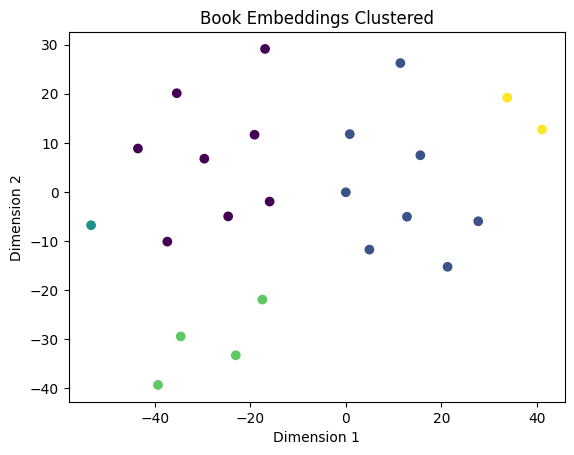

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import warnings
from warnings import simplefilter
import numpy as np


simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
vectors = np.array(vectors)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

Next, we should identify the vectors nearest to the cluster centroids (the central point).

Below is a function that accomplishes this efficiently.

In [54]:
# Determine the embeddings closest to the centroids

# Initialize a list to store indices of nearest points
closest_indices = []

# Iterate over all clusters
for i in range(num_clusters):

    # Calculate distances from the current cluster's center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Identify the index of the minimum distance (closest point)
    closest_index = np.argmin(distances)

    # Store the identified index in the list
    closest_indices.append(closest_index)


Now, arrange them in sequence (to ensure chunks are processed sequentially).

In [55]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 5, 6, 11, 18]

It's intersting to see which chunks pop up at most descriptive.

Let's create our custom prompts.

In [56]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a concise summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
Concise SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**In this example I will do the map reduce manually**

In [57]:
map_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=map_prompt_template)

Then go get your docs which the top vectors represented.

In [58]:
selected_docs = [docs[doc] for doc in selected_indices]

Let's loop through our selected docs and get a good summary for each chunk. We'll store the summary in a list.

In [59]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):

    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary)

    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

Summary #0 (chunk #0) - Preview:  The economic potential of generative AI is significant, with the technology estimated to add $2.6 trillion to $4.4 trillion annually to the global economy across 63 use cases. The technology's impact will be felt across all industry sectors, with ba 

Summary #1 (chunk #5) - Preview:  Generative AI is a technology that can personalize product discovery and search by leveraging individual customer preferences, behavior, and purchase history. This personalization can improve ecommerce sales by achieving higher website conversion ra 

Summary #2 (chunk #6) - Preview:  The passage discusses the potential of generative AI in product design and research and development (R&D). It highlights the use of generative design, a process that uses AI to generate candidate designs, and its application in various industries, s 

Summary #3 (chunk #11) - Preview:  This section discusses the potential economic benefits of accelerating labor productivity through the use o

In [60]:
# Initialize a list for storing summaries
summaries = []

# Iterate over the selected documents
for idx, document in enumerate(selected_docs):
    # Obtain a summary for the specific chunk
    summarized_chunk = map_chain.run([document])

    # Add the summarized chunk to the summaries list
    summaries.append(summarized_chunk)

    print (f"Processed Summary #{idx} (from chunk #{selected_indices[idx]}) - Snippet: {summarized_chunk[:250]} \n")

Processed Summary #0 (from chunk #0) - Snippet:  The book discusses the economic potential of generative AI and its impact on productivity, economic growth, and work activities. The authors estimate that generative AI could add up to $2.6 trillion to $4.4 trillion annually across the 63 use cases  

Processed Summary #1 (from chunk #5) - Snippet:  The section discusses the potential of generative AI in various business functions. The technology can personalize product discovery and search, as well as improve sales productivity, by identifying and prioritizing sales leads and automating sales  

Processed Summary #2 (from chunk #6) - Snippet:  This section of the book outlines the potential of generative AI in the R&D function of various industries. The authors argue that generative AI has the potential to deliver productivity gains of 10 to 15 percent of overall R&D costs, through the us 

Processed Summary #3 (from chunk #11) - Snippet:  This passage from the McKinsey Global Institute

Great, now that we have our list of summaries, let's get a summary of the summaries

In [61]:
summaries = "\n".join(summaries)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 1370 tokens


In [62]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a concise summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
CONCISE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [63]:
reduce_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
                                   )

In [64]:
output = reduce_chain.run([summaries])

In [65]:
print (output)

 The book discusses the economic potential of generative AI and its impact on productivity, economic growth, and work activities. The authors estimate that generative AI could add up to $2.6 trillion to $4.4 trillion annually across the 63 use cases analyzed. The technology could deliver value equal to an additional $200 billion to $340 billion annually in the banking industry if fully implemented. The potential impact in retail and consumer packaged goods is also significant at $400 billion to $660 billion a year. The authors also discuss the potential of generative AI to change the anatomy of work by augmenting the capabilities of individual workers and automating some of their individual activities. The acceleration in the potential for technical automation is largely due to generative AI's increased ability to understand natural language, which is required for work activities that account for 25 percent of total work time. The pace of workforce transformation is likely to accelerat

Wow that was a long process, but you get the gist, hopefully we'll see some library abstractions in the coming months that do this automatically for us!